说明：   
    1、乘的权重(w)都一样，加的偏置(b)也一样。b变成矩阵时使用广播机制。神经网络的参数w和b是网络需要学习的，其他是已知的。   
    2、学习能力越强，有可能会把输入样本中噪声的规律也学到。我们要学习数据本身真实数据的规律，学习能力要有泛化能力。   
    3、该神经网络共3层；第一层是8维到6维的非线性空间变换，第二层是6维到4维的非线性空间变换，第三层是4维到1维的非线性空间变换。   
    4、本算法中torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用    
    5、torch.sigmoid、torch.nn.Sigmoid和torch.nn.functional.sigmoid的区别:https://blog.csdn.net/yyhaohaoxuexi/article/details/90411791

In [50]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# prepare dataset
xy = np.loadtxt('diabetes_for_numpy.csv', delimiter=',', dtype=np.float32)
#原数据有字段名，适合pandas读取，numpy只需要读取数据，不需要表头（字段名）
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
z_data = torch.from_numpy(xy[:, -1])# 不是二维矩阵，是一位标量
# design model using class
 
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6) # 输入数据x的特征是8维，x有8个特征
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) # y hat
        return x
 
 
model = Model()
 
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')  
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
 
epoch_list = []
loss_list = []
# training cycle forward, backward, update
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    epoch_list.append(epoch)
    loss_list.append(loss.item())
 
    optimizer.zero_grad()
    loss.backward()
 
    optimizer.step()
 
 


0 0.6683276295661926
1 0.6662523150444031
2 0.6644324660301208
3 0.6627258658409119
4 0.6611259579658508
5 0.6596853733062744
6 0.6583685278892517
7 0.6571210026741028
8 0.655944287776947
9 0.6548483967781067
10 0.6538336277008057
11 0.652886688709259
12 0.6519993543624878
13 0.651175856590271
14 0.6504220366477966
15 0.6497375965118408
16 0.6491182446479797
17 0.6485562920570374
18 0.648044764995575
19 0.6475796103477478
20 0.6471604108810425
21 0.6467875838279724
22 0.6464560627937317
23 0.6461595892906189
24 0.6459039449691772
25 0.6456974148750305
26 0.6455320715904236
27 0.6453973054885864
28 0.645284116268158
29 0.6451845765113831
30 0.645094096660614
31 0.6450113654136658
32 0.6449353694915771
33 0.6448622345924377
34 0.6447862982749939
35 0.6447044014930725
36 0.6446159482002258
37 0.6445207595825195
38 0.6444282531738281
39 0.6443448066711426
40 0.6442784667015076
41 0.6442432999610901
42 0.6441525220870972
43 0.6440226435661316
44 0.6438956260681152
45 0.643790066242218
46 0.

480 0.46563613414764404
481 0.4654579162597656
482 0.4653378427028656
483 0.46524420380592346
484 0.4653913080692291
485 0.46588239073753357
486 0.46699056029319763
487 0.467331200838089
488 0.4662487804889679
489 0.4641333520412445
490 0.4642820656299591
491 0.4656153619289398
492 0.46477851271629333
493 0.4633304178714752
494 0.46369805932044983
495 0.4642646312713623
496 0.4634857177734375
497 0.4626745879650116
498 0.4632602035999298
499 0.46333077549934387
500 0.4624011516571045
501 0.4622972905635834
502 0.4627484083175659
503 0.46223214268684387
504 0.461690217256546
505 0.4618891179561615
506 0.46190550923347473
507 0.46142634749412537
508 0.4611726701259613
509 0.4613400399684906
510 0.46121451258659363
511 0.46080517768859863
512 0.46067318320274353
513 0.46076181530952454
514 0.4605822265148163
515 0.46026208996772766
516 0.460141658782959
517 0.4601488411426544
518 0.46003472805023193
519 0.45976710319519043
520 0.4596099853515625
521 0.45957016944885254
522 0.4594950377941

960 0.41723620891571045
961 0.4171471893787384
962 0.41700300574302673
963 0.41684797406196594
964 0.41671815514564514
965 0.4166286885738373
966 0.41658034920692444
967 0.4165671765804291
968 0.4165777266025543
969 0.416596919298172
970 0.41661229729652405
971 0.4166182279586792
972 0.4166136085987091
973 0.416599303483963
974 0.41657671332359314
975 0.41654887795448303
976 0.41651809215545654
977 0.4164859354496002
978 0.41645336151123047
979 0.416422963142395
980 0.4163973033428192
981 0.4163788855075836
982 0.41636982560157776
983 0.41637349128723145
984 0.4163939952850342
985 0.4164365530014038
986 0.41650819778442383
987 0.41661903262138367
988 0.4167815148830414
989 0.4170093536376953
990 0.4173101484775543
991 0.4176810681819916
992 0.4180784225463867
993 0.418428897857666
994 0.4185844361782074
995 0.4184536635875702
996 0.4179619252681732
997 0.41725805401802063
998 0.41652336716651917
999 0.41597220301628113


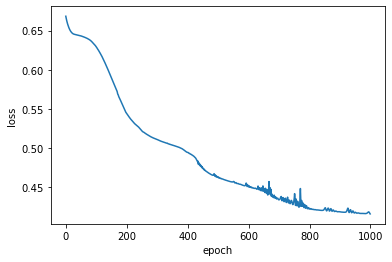

In [51]:
plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [53]:
x_data.shape,y_data.shape,z_data.shape

(torch.Size([768, 8]), torch.Size([768, 1]), torch.Size([768]))

In [54]:
z_data

tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
        0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 0., 

In [55]:
y_data

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
      

In [56]:
x_data

tensor([[  6.0000, 148.0000,  72.0000,  ...,  33.6000,   0.6270,  50.0000],
        [  1.0000,  85.0000,  66.0000,  ...,  26.6000,   0.3510,  31.0000],
        [  8.0000, 183.0000,  64.0000,  ...,  23.3000,   0.6720,  32.0000],
        ...,
        [  5.0000, 121.0000,  72.0000,  ...,  26.2000,   0.2450,  30.0000],
        [  1.0000, 126.0000,  60.0000,  ...,  30.1000,   0.3490,  47.0000],
        [  1.0000,  93.0000,  70.0000,  ...,  30.4000,   0.3150,  23.0000]])

代码说明 ：   
1、diabetes.csv数据集老师给了下载地址，该数据集需和源代码放在同一个文件夹内。  https://www.kaggle.com/datasets/saurabh00007/diabetescsv?select=diabetes.csv 

2、如果想查看某些层的参数，以神经网络的第一层参数为例，可按照以下方法进行。   

In [57]:
# 参数说明
# 第一层的参数：
layer1_weight = model.linear1.weight.data
layer1_bias = model.linear1.bias.data
print("layer1_weight", layer1_weight)
print("layer1_weight.shape", layer1_weight.shape)
print("layer1_bias", layer1_bias)
print("layer1_bias.shape", layer1_bias.shape)

layer1_weight tensor([[-0.4514, -0.4887,  1.0424,  0.2571, -0.0209,  0.1901,  4.5028,  0.5105],
        [-0.7263,  0.1537,  0.9801, -0.6841, -0.6769,  1.0209,  0.0786, -0.5155],
        [ 0.1706, -0.0342,  0.1077, -0.1231,  0.0071,  0.0661, -3.0422, -0.2842],
        [ 0.4715,  0.0412, -0.0266, -0.0395,  0.0092,  0.1083, -0.8113, -0.1525],
        [ 1.3948, -0.1454, -0.3775, -0.7626, -0.0341, -0.6389, -1.5411,  0.9462],
        [-0.1139,  0.0055,  0.0397, -0.0281, -0.0138,  0.0724,  1.0393,  0.0481]])
layer1_weight.shape torch.Size([6, 8])
layer1_bias tensor([ 1.4834,  2.3738,  4.9478, -3.8952,  5.4795, -5.1607])
layer1_bias.shape torch.Size([6])


3、更改epoch，以准确率acc为评价指标，源代码和结果如下

In [90]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
 
# prepare dataset
xy = np.loadtxt('diabetes_for_numpy.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
print("input data.shape", x_data.shape)
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
 
# print(x_data.shape)
# design model using class
 
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 2)
        self.linear4 = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) 
        x = self.sigmoid(self.linear4(x))  # y hat
        return x
 
 
model = Model()
 
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
 
 
# training cycle forward, backward, update
for epoch in tqdm(range(100)):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    # print(epoch, loss.item())
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
    if epoch%10 == 9:
        y_pred_label = torch.where(y_pred>=0.5,torch.tensor([1.0]),torch.tensor([0.0]))
 
        acc = torch.eq(y_pred_label, y_data).sum().item()/y_data.size(0)
        print("loss = ",loss.item(), "acc = ",acc)
 
 

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1743.61it/s]

input data.shape torch.Size([768, 8])
loss =  0.6470955014228821 acc =  0.6510416666666666
loss =  0.647078812122345 acc =  0.6510416666666666
loss =  0.6470630168914795 acc =  0.6510416666666666
loss =  0.6470480561256409 acc =  0.6510416666666666
loss =  0.6470339298248291 acc =  0.6510416666666666
loss =  0.6470206379890442 acc =  0.6510416666666666
loss =  0.6470082402229309 acc =  0.6510416666666666
loss =  0.6469965577125549 acc =  0.6510416666666666
loss =  0.6469854712486267 acc =  0.6510416666666666
loss =  0.646975040435791 acc =  0.6510416666666666


In [77]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
 
# prepare dataset
xy = np.loadtxt('diabetes_for_numpy.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
print("input data.shape", x_data.shape)
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
 
# print(x_data.shape)
# design model using class
 
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 2)
        self.linear4 = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) 
        x = self.sigmoid(self.linear4(x))  # y hat
        return x
 
 
model = Model()
 
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
 
 
# training cycle forward, backward, update
for epoch in tqdm(range(1000000)):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    # print(epoch, loss.item())
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
    if epoch%100000 == 99999:
        y_pred_label = torch.where(y_pred>=0.5,torch.tensor([1.0]),torch.tensor([0.0]))
 
        acc = torch.eq(y_pred_label, y_data).sum().item()/y_data.size(0)
        print("loss = ",loss.item(), "acc = ",acc)

  0%|                                                                          | 277/1000000 [00:00<12:07, 1374.09it/s]

input data.shape torch.Size([768, 8])


 10%|███████                                                                | 100146/1000000 [01:23<12:37, 1187.20it/s]

loss =  0.39477792382240295 acc =  0.80859375


 20%|██████████████▏                                                        | 200218/1000000 [02:48<11:15, 1183.25it/s]

loss =  0.3963114023208618 acc =  0.8033854166666666


 30%|█████████████████████▎                                                 | 300128/1000000 [04:15<10:33, 1104.59it/s]

loss =  0.39250388741493225 acc =  0.8020833333333334


 40%|████████████████████████████▍                                          | 400220/1000000 [05:43<08:34, 1166.44it/s]

loss =  0.385451078414917 acc =  0.8111979166666666


 50%|███████████████████████████████████▌                                   | 500224/1000000 [07:11<07:29, 1110.89it/s]

loss =  0.3897014558315277 acc =  0.796875


 60%|██████████████████████████████████████████▌                            | 600246/1000000 [08:39<05:47, 1150.00it/s]

loss =  0.40235015749931335 acc =  0.8072916666666666


 70%|█████████████████████████████████████████████████▋                     | 700166/1000000 [10:07<04:27, 1120.25it/s]

loss =  0.38106414675712585 acc =  0.8098958333333334


 80%|████████████████████████████████████████████████████████▊              | 800185/1000000 [11:37<02:58, 1117.31it/s]

loss =  0.38053008913993835 acc =  0.8098958333333334


 90%|███████████████████████████████████████████████████████████████▉       | 900124/1000000 [13:06<01:29, 1113.52it/s]

loss =  0.38725635409355164 acc =  0.8111979166666666


100%|██████████████████████████████████████████████████████████████████████| 1000000/1000000 [14:36<00:00, 1141.43it/s]

loss =  0.39199838042259216 acc =  0.80859375
